In [1]:
library(ggplot2)
library(gridExtra)
library(repr)

In [2]:
options(warn=-1, repr.plot.width = 16, repr.plot.height = 12)

In [3]:
get_data <- function (n) {
    m <- floor(n / 2)
    x <- seq(-m, m)
    id <- x
    exp10 <- 10^x
    exp2 <- 2^x
    symexp <- ifelse(x >= 0, ifelse(x == 0, x, 10^x), -10^(-x))
    data.frame(x = x, id = id, exp10 = exp10, exp2 = exp2, symexp = symexp)
}

In [4]:
df <- get_data(9)
tail(df)

,x,id,exp10,exp2,symexp
,<int>,<int>,<dbl>,<dbl>,<dbl>
4,-1,-1,1e-01,0.5,-10
5,0,0,1e+00,1.0,0
6,1,1,1e+01,2.0,10
7,2,2,1e+02,4.0,100
8,3,3,1e+03,8.0,1000
9,4,4,1e+04,16.0,10000


In [5]:
get_plot <- function (col, trans) {
    ggplot(df, aes(x = x, y = get(col))) +
        geom_point() +
        scale_y_continuous(breaks = df[, col], trans = trans) +
        ggtitle(sprintf("col = '%s', trans = '%s'", col, trans))
}

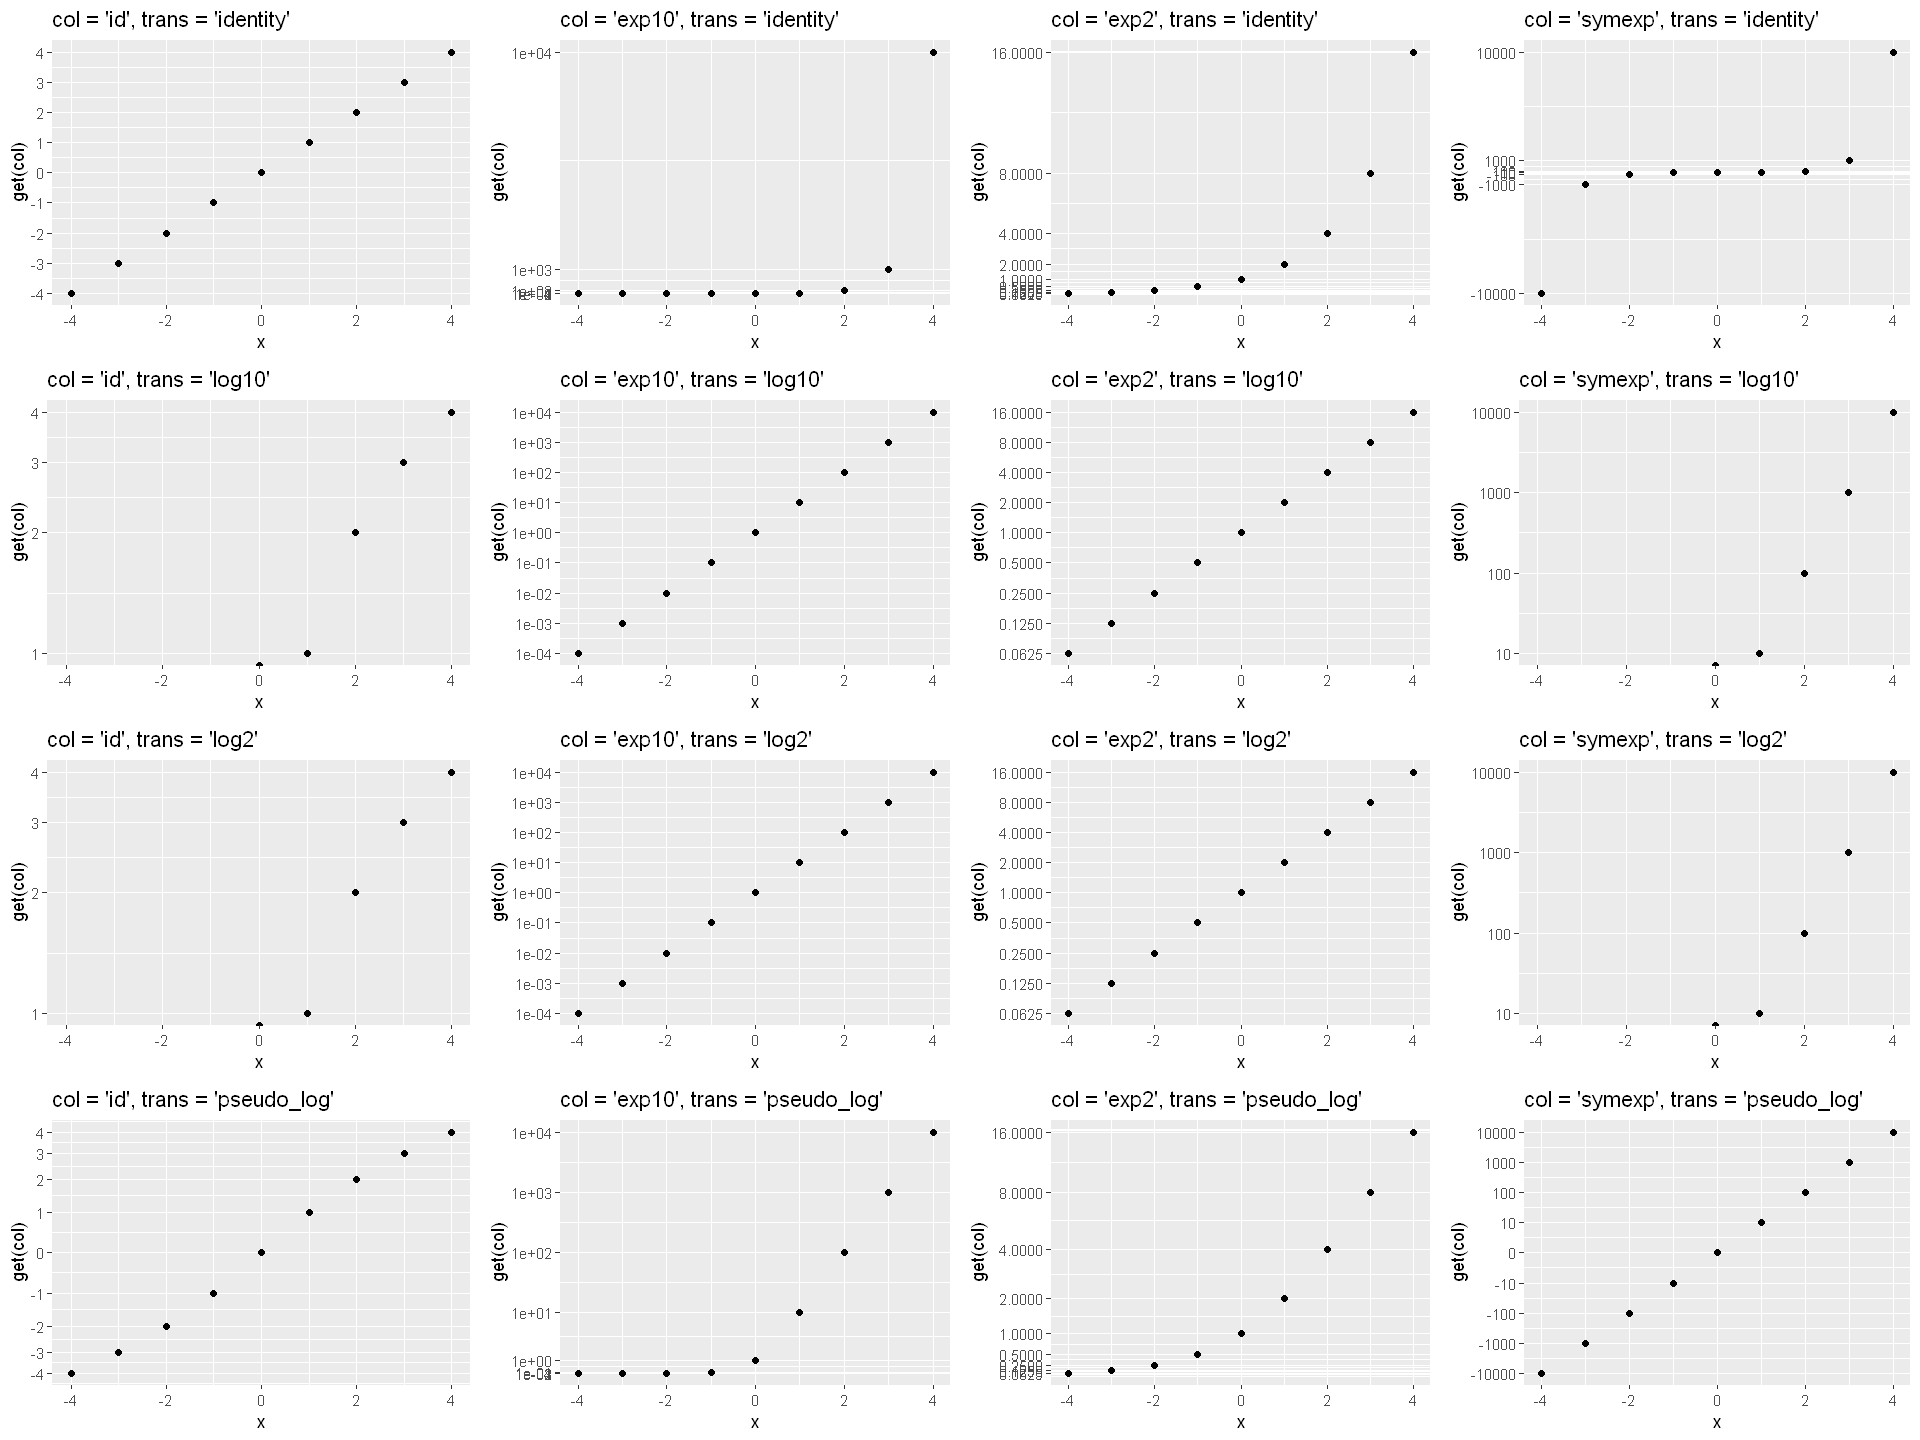

In [6]:
grid.arrange(
    get_plot('id', 'identity'), get_plot('exp10', 'identity'), get_plot('exp2', 'identity'), get_plot('symexp', 'identity'),
    get_plot('id', 'log10'), get_plot('exp10', 'log10'), get_plot('exp2', 'log10'), get_plot('symexp', 'log10'),
    get_plot('id', 'log2'), get_plot('exp10', 'log2'), get_plot('exp2', 'log2'), get_plot('symexp', 'log2'),
    get_plot('id', 'pseudo_log'), get_plot('exp10', 'pseudo_log'), get_plot('exp2', 'pseudo_log'), get_plot('symexp', 'pseudo_log'),
ncol = 4)